In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_excel("Telco-Customer-Churn.xlsx")
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
churn=dataset[['customerID','gender','Churn']]
yeschurn= churn[churn['Churn']=='Yes']
yeschurn

,customerID,gender,Churn
2,3668-QPYBK,Male,Yes
4,9237-HQITU,Female,Yes
5,9305-CDSKC,Female,Yes
8,7892-POOKP,Female,Yes
13,0280-XJGEX,Male,Yes
...,...,...,...
7021,1699-HPSBG,Male,Yes
7026,8775-CEBBJ,Female,Yes
7032,6894-LFHLY,Male,Yes
7034,0639-TSIQW,Female,Yes


In [4]:
Male= yeschurn[yeschurn['gender']=="Male"].count()
Female=yeschurn[yeschurn['gender']=="Female"].count() 
x={"Gender":['Male', 'Female'],"Count":[Male['gender'], Female['gender']]};
df= pd.DataFrame(x)
df

,Gender,Count
0,Male,930
1,Female,939


Text(0.5, 1.0, 'Churn Count Comparisson')

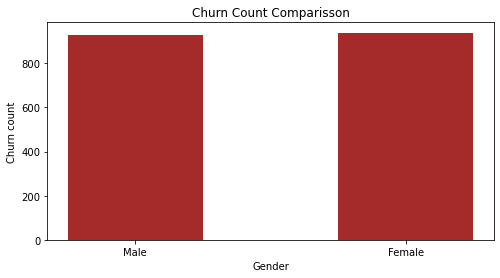

In [5]:
plt.rcParams.update({'figure.figsize':(8,4)})
a=df['Gender']
b=df['Count']
plot=plt.bar(a,b, color='brown', width=.5)
plt.xlabel("Gender")
plt.ylabel("Churn count")
plt.title("Churn Count Comparisson")

# 2. Find out how many female senior citizens there in the dataset

In [6]:
SC=dataset[(dataset['gender']=="Female")&(dataset['SeniorCitizen']==1)]
print("No: of female senior citizen: ", SC['gender'].count())

No: of female senior citizen:  568


In [7]:
SC1=dataset[(dataset['gender']=="Male")&(dataset['SeniorCitizen']==1)]
print("No: of male senior citizen: ",SC1['gender'].count())

No: of male senior citizen:  574


In [8]:
d1 = {"Gender":['Male', 'Female'],"Senior Citizen":[574,568]};
df1 = pd.DataFrame(d1)
df1

,Gender,Senior Citizen
0,Male,574
1,Female,568


Text(0.5, 1.0, 'Number of Senior Citizens within Total customers')

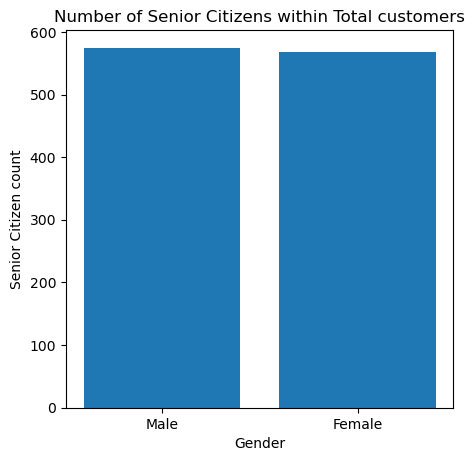

In [9]:

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
x1= df1['Gender']
y1= df1['Senior Citizen']
plot1=plt.bar(x1,y1,width=.8)
plt.xlabel("Gender")
plt.ylabel("Senior Citizen count")
plt.title("Number of Senior Citizens within Total customers")

# 3 Compare 'tenure' with 'Total Charges'  

In [10]:
x=dataset[['tenure','TotalCharges']]
c=x['tenure']
d=x['TotalCharges']
d= pd.to_numeric(d, errors = 'coerce')

Text(0, 0.5, 'Total Charges')

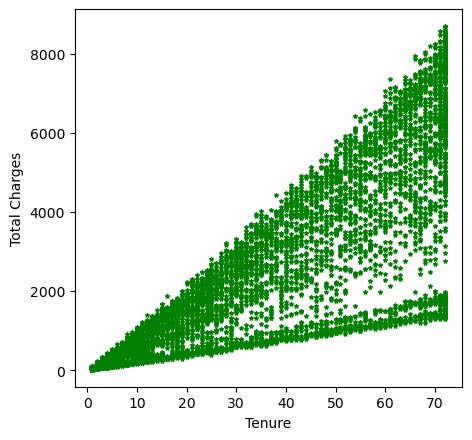

In [11]:
plt.scatter(c,d, color='green', marker='*',s=8)
plt.xlabel("Tenure")
plt.ylabel("Total Charges")

# 4.Find out which contract preffered by the senior citizen

In [12]:
dataset["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [13]:
Total_SC= SC1['gender'].count() + SC['gender'].count()
Total_SC

1142

In [14]:
df4 = {"Contract Type":['Month-to-month', 'Two year', 'One year'],"Count":[3875,1695,1473]};
dfx= pd.DataFrame(df4)
dfx

,Contract Type,Count
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


Text(0.5, 1.0, 'Preffered contract types with in senior citizen')

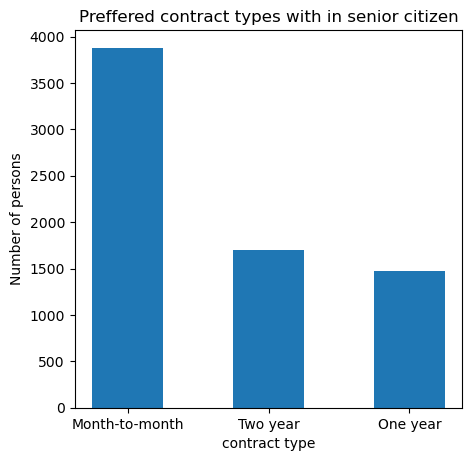

In [15]:
x3=dfx['Contract Type']
y3=dfx['Count']
plt3=plt.bar(x3,y3,width=.5)
plt.xlabel("contract type")
plt.ylabel("Number of persons")
plt.title("Preffered contract types with in senior citizen")

# 5 Comment your finds on Payment Method?

In [16]:
dataset["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

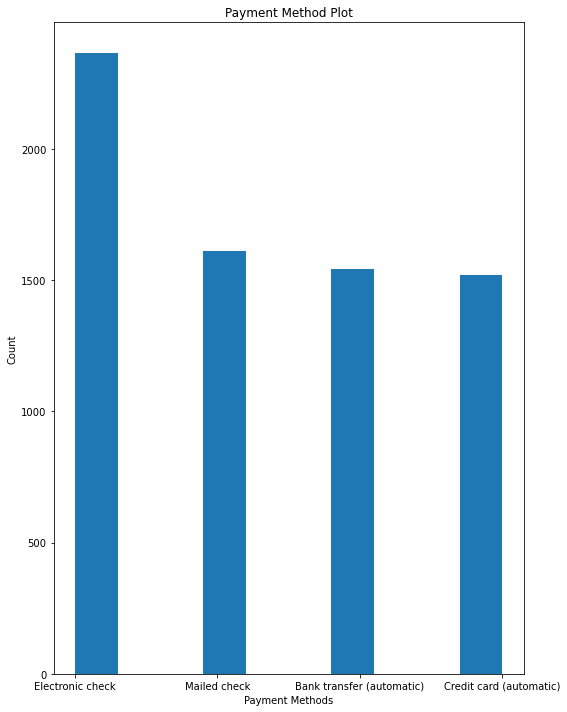

In [11]:
plt.figure(figsize=(8,10))
plt.hist(dataset['PaymentMethod'])
plt.xlabel('Payment Methods')
plt.ylabel('Count')
plt.title('Payment Method Plot',)
plt.tight_layout()